In [1]:
import numpy as np
from scipy.ndimage.interpolation import zoom

from keras.preprocessing.video import video_to_array
from work.config import *
from work.dataset.activitynet import ActivityNetDataset
from work.models.c3d import C3D_conv_features

assert STORED_FEATURES_PATH
assert STORED_VIDEOS_PATH
assert STORED_VIDES_EXTENSION

ImportError: No module named models.c3d

In [3]:
# Defining variables
loading_size = (128, 171)
input_size = (112, 112)
length = 16
batch_size = 32
output_dim = 4096

# Loading dataset
print('Loading dataset')
dataset = ActivityNetDataset(
    videos_path='../dataset/videos.json',
    labels_path='../dataset/labels.txt',
    stored_videos_path=STORED_VIDEOS_PATH,
    files_extension=STORED_VIDES_EXTENSION
)

Loading dataset


In [8]:
print('Loading mean')
mean_total = np.load('../models/c3d/c3d-sports1M_mean.npy')
mean = np.mean(mean_total, axis=(0, 2, 3, 4), keepdims=True)

Loading mean


In [14]:
video = dataset.videos[0]
instances = video.get_video_instances(length=length, overlap=0)
nb_instances = len(instances)

path = STORED_VIDEOS_PATH + '/' + video.video_id + '.' + STORED_VIDES_EXTENSION
vid_array = video_to_array(path, start_frame=0,
                           length=length*nb_instances,
                           resize=input_size)
print(vid_array.shape)
vid_array = vid_array.transpose(1, 0, 2, 3)
print(vid_array.shape)
vid_array = vid_array.reshape((nb_instances, length, 3,)+(input_size))
print(vid_array.shape)
vid_array = vid_array.transpose(0, 2, 1, 3, 4)
print(vid_array.shape)

(3, 4160, 112, 112)
(4160, 3, 112, 112)
(260, 16, 3, 112, 112)
(260, 3, 16, 112, 112)


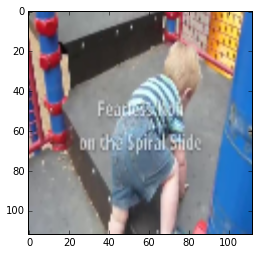

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(vid_array[0,:,10,:,:].transpose(1,2,0)/255)
plt.show()

In [18]:
X = vid_array - mean
print(X.shape)

(260, 3, 16, 112, 112)


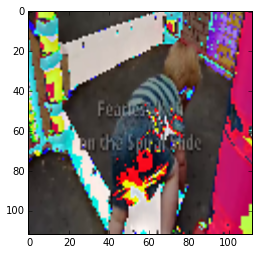

In [19]:
plt.imshow(X[0,:,10,:,:].transpose(1,2,0)/255)
plt.show()

In [20]:
print(X)

[[[[[  51.74835323  116.74835323  135.74835323 ...,  -45.25164677
      -46.25164677  -46.25164677]
    [  48.74835323  108.74835323  105.74835323 ...,  -45.25164677
      -46.25164677  -46.25164677]
    [  29.74835323   85.74835323   79.74835323 ...,  -46.25164677
      -46.25164677  -46.25164677]
    ..., 
    [  57.74835323   57.74835323   58.74835323 ...,  -63.25164677
      -61.25164677  -61.25164677]
    [  57.74835323   57.74835323   57.74835323 ...,  -66.25164677
      -64.25164677  -64.25164677]
    [  57.74835323   57.74835323   57.74835323 ...,  -66.25164677
      -64.25164677  -64.25164677]]

   [[  46.74835323   92.74835323  139.74835323 ...,  -45.25164677
      -46.25164677  -46.25164677]
    [  39.74835323   90.74835323  116.74835323 ...,  -45.25164677
      -46.25164677  -46.25164677]
    [  16.74835323   77.74835323   88.74835323 ...,  -45.25164677
      -46.25164677  -46.25164677]
    ..., 
    [  57.74835323   57.74835323   58.74835323 ...,  -64.25164677
      -61.25